In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("./data/excel-comp-data.xlsx")
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


In [4]:
df["total"] = df["Jan"] + df["Feb"] + df["Mar"]
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar,total
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000,107000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000,175000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000,246000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000,175000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000,317000


In [5]:
df["Jan"].sum(), df["Jan"].mean(),df["Jan"].min(),df["Jan"].max()

(1462000, 97466.66666666667, 10000, 162000)

In [6]:
sum_row=df[["Jan","Feb","Mar","total"]].sum()
sum_row

Jan      1462000
Feb      1507000
Mar       717000
total    3686000
dtype: int64

In [7]:
df_sum=pd.DataFrame(data=sum_row).T
df_sum

,Jan,Feb,Mar,total
0,1462000,1507000,717000,3686000


In [8]:
df_sum=df_sum.reindex(columns=df.columns)
df_sum

,account,name,street,city,state,postal-code,Jan,Feb,Mar,total
0,NaN,NaN,NaN,NaN,NaN,NaN,1462000,1507000,717000,3686000


In [9]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
state_to_code = {"VERMONT": "VT", "GEORGIA": "GA", "IOWA": "IA", "Armed Forces Pacific": "AP", "GUAM": "GU",
                 "KANSAS": "KS", "FLORIDA": "FL", "AMERICAN SAMOA": "AS", "NORTH CAROLINA": "NC", "HAWAII": "HI",
                 "NEW YORK": "NY", "CALIFORNIA": "CA", "ALABAMA": "AL", "IDAHO": "ID", "FEDERATED STATES OF MICRONESIA": "FM",
                 "Armed Forces Americas": "AA", "DELAWARE": "DE", "ALASKA": "AK", "ILLINOIS": "IL",
                 "Armed Forces Africa": "AE", "SOUTH DAKOTA": "SD", "CONNECTICUT": "CT", "MONTANA": "MT", "MASSACHUSETTS": "MA",
                 "PUERTO RICO": "PR", "Armed Forces Canada": "AE", "NEW HAMPSHIRE": "NH", "MARYLAND": "MD", "NEW MEXICO": "NM",
                 "MISSISSIPPI": "MS", "TENNESSEE": "TN", "PALAU": "PW", "COLORADO": "CO", "Armed Forces Middle East": "AE",
                 "NEW JERSEY": "NJ", "UTAH": "UT", "MICHIGAN": "MI", "WEST VIRGINIA": "WV", "WASHINGTON": "WA",
                 "MINNESOTA": "MN", "OREGON": "OR", "VIRGINIA": "VA", "VIRGIN ISLANDS": "VI", "MARSHALL ISLANDS": "MH",
                 "WYOMING": "WY", "OHIO": "OH", "SOUTH CAROLINA": "SC", "INDIANA": "IN", "NEVADA": "NV", "LOUISIANA": "LA",
                 "NORTHERN MARIANA ISLANDS": "MP", "NEBRASKA": "NE", "ARIZONA": "AZ", "WISCONSIN": "WI", "NORTH DAKOTA": "ND",
                 "Armed Forces Europe": "AE", "PENNSYLVANIA": "PA", "OKLAHOMA": "OK", "KENTUCKY": "KY", "RHODE ISLAND": "RI",
                 "DISTRICT OF COLUMBIA": "DC", "ARKANSAS": "AR", "MISSOURI": "MO", "TEXAS": "TX", "MAINE": "ME"}

f:\multimedia\dokumenty\studia\knsi_golem\wsiml\.venv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [19]:
if process.extractOne("Minnesotta",choices=state_to_code.keys()):
    print("boom")

boom


In [18]:
process.extractOne("AlaBAMMazzz",choices=state_to_code.keys(), score_cutoff=75)

('ALABAMA', 78)

In [20]:
def convert_state(row):
    abbrev = process.extractOne(row["state"],choices=state_to_code.keys(),score_cutoff=80)
    if abbrev:
        return state_to_code[abbrev[0]]
    return np.nan

In [28]:
df_final = df
df_final.insert(6, "abbrev", np.nan)
df_final.head()

,account,name,street,city,state,postal-code,abbrev,Jan,Feb,Mar,total
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,NaN,10000,62000,35000,107000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,NaN,95000,45000,35000,175000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,NaN,91000,120000,35000,246000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,NaN,45000,120000,10000,175000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,NaN,162000,120000,35000,317000


In [29]:
df_final['abbrev'] = df_final.apply(convert_state, axis=1)
df_final.tail()

,account,name,street,city,state,postal-code,abbrev,Jan,Feb,Mar,total
10,214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,TN,45000,120000,55000,220000
11,231907,Hahn-Moore,18115 Olivine Throughway,Norbertomouth,NorthDakota,31415,ND,150000,10000,162000,322000
12,242368,"Frami, Anderson and Donnelly",182 Bertie Road,East Davian,Iowa,72686,IA,162000,120000,35000,317000
13,268755,Walsh-Haley,2624 Beatty Parkways,Goodwinmouth,RhodeIsland,31919,RI,55000,120000,35000,210000
14,273274,McDermott PLC,8917 Bergstrom Meadow,Kathryneborough,Delaware,27933,DE,150000,120000,70000,340000


In [34]:
df_sub=df_final[["abbrev","Jan","Feb","Mar","total"]].groupby('abbrev').sum()
df_sub

,Jan,Feb,Mar,total
abbrev,,,,
AR,150000,120000,35000,305000
CA,162000,120000,35000,317000
DE,150000,120000,70000,340000
IA,253000,240000,70000,563000
ID,70000,120000,35000,225000
ME,45000,120000,10000,175000
MS,62000,120000,70000,252000
NC,95000,45000,35000,175000
ND,150000,10000,162000,322000


In [35]:
def money(x):
    return "${:,.0f}".format(x)

formatted_df = df_sub.applymap(money)
formatted_df

,Jan,Feb,Mar,total
abbrev,,,,
AR,"$150,000","$120,000","$35,000","$305,000"
CA,"$162,000","$120,000","$35,000","$317,000"
DE,"$150,000","$120,000","$70,000","$340,000"
IA,"$253,000","$240,000","$70,000","$563,000"
ID,"$70,000","$120,000","$35,000","$225,000"
ME,"$45,000","$120,000","$10,000","$175,000"
MS,"$62,000","$120,000","$70,000","$252,000"
NC,"$95,000","$45,000","$35,000","$175,000"
ND,"$150,000","$10,000","$162,000","$322,000"


In [36]:
sum_row=df_sub[["Jan","Feb","Mar","total"]].sum()
sum_row

Jan      1462000
Feb      1507000
Mar       717000
total    3686000
dtype: int64

In [37]:
df_sub_sum=pd.DataFrame(data=sum_row).T
df_sub_sum=df_sub_sum.applymap(money)
df_sub_sum

,Jan,Feb,Mar,total
0,"$1,462,000","$1,507,000","$717,000","$3,686,000"


In [38]:
final_table = formatted_df.append(df_sub_sum)
final_table

,Jan,Feb,Mar,total
AR,"$150,000","$120,000","$35,000","$305,000"
CA,"$162,000","$120,000","$35,000","$317,000"
DE,"$150,000","$120,000","$70,000","$340,000"
IA,"$253,000","$240,000","$70,000","$563,000"
ID,"$70,000","$120,000","$35,000","$225,000"
ME,"$45,000","$120,000","$10,000","$175,000"
MS,"$62,000","$120,000","$70,000","$252,000"
NC,"$95,000","$45,000","$35,000","$175,000"
ND,"$150,000","$10,000","$162,000","$322,000"
PA,"$70,000","$95,000","$35,000","$200,000"


In [39]:
final_table = final_table.rename(index={0:"Total"})
final_table

,Jan,Feb,Mar,total
AR,"$150,000","$120,000","$35,000","$305,000"
CA,"$162,000","$120,000","$35,000","$317,000"
DE,"$150,000","$120,000","$70,000","$340,000"
IA,"$253,000","$240,000","$70,000","$563,000"
ID,"$70,000","$120,000","$35,000","$225,000"
ME,"$45,000","$120,000","$10,000","$175,000"
MS,"$62,000","$120,000","$70,000","$252,000"
NC,"$95,000","$45,000","$35,000","$175,000"
ND,"$150,000","$10,000","$162,000","$322,000"
PA,"$70,000","$95,000","$35,000","$200,000"


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)

In [41]:
# this would be a huge pain to load into a database
mo = pd.read_csv('data/mariano-rivera.csv')
mo.tail()

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
14,2009,39,NYY,AL,3,3,0.500,1.76,66,0,55,0,0,44,66.1,48,14,13,7,12,1,72,1,0,1,257,262,0.905,6.5,0.9,1.6,9.8,6.00,ASMVP-14
15,2010,40,NYY,AL,3,3,0.500,1.80,61,0,55,0,0,33,60.0,39,14,12,2,11,3,45,5,0,0,230,241,0.833,5.9,0.3,1.7,6.8,4.09,AS
16,2011,41,NYY,AL,1,2,0.333,1.91,64,0,54,0,0,44,61.1,47,13,13,3,8,2,60,2,0,1,233,226,0.897,6.9,0.4,1.2,8.8,7.50,ASCYA-8
17,2012,42,NYY,AL,1,1,0.500,2.16,9,0,9,0,0,5,8.1,6,2,2,0,2,2,8,0,0,0,32,203,0.960,6.5,0.0,2.2,8.6,4.00,NaN
18,2013,43,NYY,AL,6,2,0.750,2.11,64,0,60,0,0,44,64.0,58,16,15,6,9,3,54,1,0,0,256,192,1.047,8.2,0.8,1.3,7.6,6.00,AS


In [42]:
clip = pd.read_clipboard()
clip.head()

,fl_date,tail_num
10,2017-01-01,N756AA
11,2017-01-01,N807AA
12,2017-01-01,N755AA
13,2017-01-01,N951AA
14,2017-01-01,N523AA


In [44]:
# All of this is basically the same as it would be with Postgres, MySQL, or any other database
# Just pass pandas a connection object and it'll take care of the rest.
from pandas.io import sql
import sqlite3
conn = sqlite3.connect('data/towed.db')
query = "SELECT * FROM towed"
towed = sql.read_sql(query, con=conn, parse_dates={'date':'%m/%d/%Y'})
towed.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


In [45]:
towed.info() # empty string showing up as non-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 10 columns):
date              5065 non-null datetime64[ns]
make              5065 non-null object
style             5065 non-null object
model             5065 non-null object
color             5065 non-null object
plate             5065 non-null object
state             5065 non-null object
towed_to          5065 non-null object
facility_phone    5065 non-null object
inventory_num     5065 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 395.8+ KB


In [46]:
mo.info() # note the nulls in the Awards column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 34 columns):
Year      19 non-null int64
Age       19 non-null int64
Tm        19 non-null object
Lg        19 non-null object
W         19 non-null int64
L         19 non-null int64
W-L%      19 non-null float64
ERA       19 non-null float64
G         19 non-null int64
GS        19 non-null int64
GF        19 non-null int64
CG        19 non-null int64
SHO       19 non-null int64
SV        19 non-null int64
IP        19 non-null float64
H         19 non-null int64
R         19 non-null int64
ER        19 non-null int64
HR        19 non-null int64
BB        19 non-null int64
IBB       19 non-null int64
SO        19 non-null int64
HBP       19 non-null int64
BK        19 non-null int64
WP        19 non-null int64
BF        19 non-null int64
ERA+      19 non-null int64
WHIP      19 non-null float64
H/9       19 non-null float64
HR/9      19 non-null float64
BB/9      19 non-null float64
SO/9      19 

In [47]:
mo.describe() # basic stats for any numeric column

,Year,Age,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2004.000000,34.000000,4.315789,3.157895,0.570158,2.222105,58.684211,0.526316,50.105263,0.0,0.0,34.315789,67.315789,52.526316,17.894737,16.578947,3.736842,15.052632,2.157895,61.736842,2.421053,0.157895,0.684211,268.578947,222.157895,0.998684,6.994737,0.489474,1.994737,8.142105,4.870000
std,5.627314,5.627314,2.083070,1.462994,0.174293,0.918861,17.023032,2.294157,19.944074,0.0,0.0,15.198877,18.657506,15.886292,8.305920,8.064434,2.423086,8.140937,1.500487,24.250641,1.894899,0.374634,0.749269,75.045405,56.108291,0.171747,1.107787,0.328117,0.779939,1.403296,2.553853
min,1995.000000,25.000000,1.000000,0.000000,0.200000,1.380000,9.000000,0.000000,2.000000,0.0,0.0,0.000000,8.100000,6.000000,2.000000,2.000000,0.000000,2.000000,0.000000,8.000000,0.000000,0.000000,0.000000,32.000000,84.000000,0.665000,5.200000,0.000000,0.800000,5.300000,1.700000
25%,1999.500000,29.500000,3.000000,2.000000,0.500000,1.800000,61.000000,0.000000,51.500000,0.0,0.0,31.500000,62.550000,45.000000,14.000000,13.000000,2.500000,10.500000,1.000000,51.500000,1.000000,0.000000,0.000000,251.000000,192.000000,0.901000,6.300000,0.300000,1.300000,6.900000,3.350000
50%,2004.000000,34.000000,4.000000,3.000000,0.571000,1.910000,64.000000,0.000000,57.000000,0.0,0.0,39.000000,70.200000,58.000000,16.000000,14.000000,3.000000,12.000000,2.000000,60.000000,2.000000,0.000000,1.000000,277.000000,233.000000,0.994000,6.900000,0.400000,2.100000,8.000000,4.090000
75%,2008.500000,38.500000,6.000000,4.000000,0.651500,2.250000,66.000000,0.000000,60.500000,0.0,0.0,44.000000,75.100000,63.000000,21.000000,19.000000,4.500000,19.000000,3.000000,73.000000,4.000000,0.000000,1.000000,303.500000,254.500000,1.070500,7.600000,0.600000,2.400000,9.250000,6.085000
max,2013.000000,43.000000,8.000000,6.000000,1.000000,5.510000,74.000000,10.000000,69.000000,0.0,0.0,53.000000,107.200000,73.000000,43.000000,41.000000,11.000000,34.000000,6.000000,130.000000,6.000000,1.000000,2.000000,425.000000,316.000000,1.507000,9.500000,1.500000,4.000000,10.900000,12.830000


In [48]:
towed.set_index('date', inplace=True)

In [51]:
towed.loc['2014-11-04']

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244
2014-11-04,FORD,SW,,SIL,S860992,IL,10300 S. Doty,(773) 568-8495,2749362
2014-11-04,DODG,VN,,RED,571R990,IL,701 N. Sacramento,(773) 265-7605,6797239
2014-11-04,DODG,PK,TK,BRO,1381812,IL,10300 S. Doty,(773) 568-8495,2749364
2014-11-04,ZCZY,2D,,BRO,,IL,10300 S. Doty,(773) 785-9752,1714849


In [52]:
towed.reset_index(inplace=True)
towed[towed['date'] == '2014-11-04']

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
1350,2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
1351,2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
1352,2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
1353,2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
1354,2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244
1355,2014-11-04,FORD,SW,,SIL,S860992,IL,10300 S. Doty,(773) 568-8495,2749362
1356,2014-11-04,DODG,VN,,RED,571R990,IL,701 N. Sacramento,(773) 265-7605,6797239
1357,2014-11-04,DODG,PK,TK,BRO,1381812,IL,10300 S. Doty,(773) 568-8495,2749364
1358,2014-11-04,ZCZY,2D,,BRO,,IL,10300 S. Doty,(773) 785-9752,1714849
1359,2014-11-04,CHEV,4D,,SIL,,,10300 S. Doty,(773) 568-8495,2749363


In [53]:
towed.set_index('date', inplace=True)

In [54]:
cols = ['make', 'color', 'state'] # just passing a list
towed[cols][:5]

,make,color,state
date,,,
2014-11-18,FORD,BLK,IL
2014-11-18,HOND,BLK,IL
2014-11-18,CHRY,SIL,IL
2014-11-18,HYUN,SIL,IL
2014-11-18,TOYT,WHI,IL


In [56]:
towed[towed['make'] == 'FORD'].sort_values('state', ascending=False).head()

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-10,FORD,4D,,BLU,250WLU,WI,701 N. Sacramento,(773) 265-7605,6797787
2014-11-06,FORD,4D,,GRN,217WCX,WI,701 N. Sacramento,(773) 265-7605,6797379
2014-11-08,FORD,LL,,BLK,635FJE,WI,10300 S. Doty,(773) 568-8495,2749537
2014-10-19,FORD,LL,,BLK,178WDL,WI,10300 S. Doty,(773) 568-8495,464400
2014-10-06,FORD,2D,,ONG,198WJX,WI,701 N. Sacramento,(773) 265-7605,6794908


In [57]:
towed[(towed.color == 'BLK') & (towed.state == 'MI')]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-12,DODG,LL,,BLK,CLV6160,MI,701 N. Sacramento,(773) 265-7605,6797946
2014-09-08,CHEV,2D,,BLK,3KMT29,MI,10300 S. Doty,(773) 568-8495,2745448
2014-08-27,KIA,4D,,BLK,DAN1057,MI,701 N. Sacramento,(773) 265-7605,6791554


In [58]:
towed[(towed.make == 'PORS') | (towed.state == 'NY')].sort_values(['make', 'color'], ascending=[True, False]) # not red Porshe

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-11-11,BUIC,LL,,WHI,GNW2480,NY,10300 S. Doty,(773) 568-8495,2749681
2014-10-08,PORS,LL,,RED,V515513,IL,701 N. Sacramento,(773) 265-7605,6795116
2014-11-01,PORS,LL,,BLK,V671447,IL,10300 S. Doty,(773) 568-8495,2749122
2014-09-25,PORS,LL,,BLK,,IL,701 N. Sacramento,(773) 265-7605,6794214
2014-09-19,PORS,LL,,BLK,V733398,IL,701 N. Sacramento,(773) 265-7605,6793740
2014-09-01,SUZI,4D,,GRY,EHL9836,NY,10300 S. Doty,(773) 568-8495,2744842


In [61]:
towed[towed.duplicated()]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-18,NISS,4D,,GRY,E203840,IL,400 E. Lower Wacker,(312) 744-7550,6798305
2014-11-06,BUIC,4D,,PLE,R4548,IL,701 N. Sacramento,(773) 265-7605,6797394
2014-11-03,FORD,4D,,BLK,S227831,IL,10300 S. Doty,(773) 568-8495,2749299
2014-10-19,MERZ,LL,TK,BLK,MINE-IP,IL,701 N. Sacramento,(773) 265-7605,6795998
2014-10-11,FORD,LL,,RED,,IL,10300 S. Doty,(773) 568-8495,2747534
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-04,CHEV,4D,LUM,WHI,S880655,IL,10300 S. Doty,(773) 568-8495,2745054
2014-09-03,CHEV,LL,,GRY,K585960,IL,10300 S. Doty,(773) 568-8495,2744980


In [63]:
from datetime import datetime
to_datetime = lambda d: datetime.strptime(d, '%m/%d/%Y %H:%M')

In [64]:
# if you know the datetime format, it's much, much faster to explicitly parse it
# see here: https://gist.github.com/gjreda/7433f5f70299610d9b6b
trips = pd.read_csv('data/divvy/Divvy_Trips_2013.csv',
                    converters={'starttime': to_datetime,'stoptime': to_datetime},
                    thousands=',')
stations = pd.read_csv('data/divvy/Divvy_Stations_2013.csv')

f:\multimedia\dokumenty\studia\knsi_golem\wsiml\.venv\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759788 entries, 0 to 759787
Data columns (total 12 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 69.6+ MB


In [66]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
name          300 non-null object
latitude      300 non-null float64
longitude     300 non-null float64
dpcapacity    300 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.5+ KB


In [67]:
# CREATE TABLE divvy (
#   SELECT *
#   FROM trips
#   LEFT JOIN stations
#     ON trips.from_station_name = stations.name
# );
divvy = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 16 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name                 759788 non-null object
latitude             759788 non-null float64
longitude            759788 non-null float64
dpcapacity           759788 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 98.5+ MB


In [68]:
# SELECT trip_id, ... divvy.name AS name_origin ... stations.name AS name_dest
# FROM divvy
# INNER JOIN stations
#   ON divvy.to_station_name = stations.name
divvy = pd.merge(divvy, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 20 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name_origin          759788 non-null object
latitude_origin      759788 non-null float64
longitude_origin     759788 non-null float64
dpcapacity_origin    759788 non-null int64
name_dest            759788 non-null object
latitude_dest        759788 non-null float64
longitude_dest       759788 non-null float64
dpcapacity_dest      759788 non-nu

In [70]:
df1 = pd.DataFrame({'a': np.random.randn(3), 'b': np.square(range(100,103))})
df2 = pd.DataFrame({'a': [np.NaN, 11, 99], 'b': np.random.randn(3)})

In [71]:
# SELECT a, b
# FROM df1
# UNION
# SELECT a, b
# FROM df2;

# takes a list, so you can pass 2+ dataframes
# note that the indexes are the same
pd.concat([df1, df2])

,a,b
0,0.015591,10000.000000
1,-0.049386,10201.000000
2,-1.287293,10404.000000
0,NaN,0.865912
1,11.000000,1.036745
2,99.000000,-0.658059


In [73]:
# it's precise to the minute - want to see counts by nearest hour
divvy.starttime.value_counts().sort_values()[:3]

2013-08-25 05:13:00    1
2013-11-06 22:06:00    1
2013-07-05 17:12:00    1
Name: starttime, dtype: int64

In [74]:
# I don't want to just extract the hour from the datetime ... NEAREST hour
from datetime import timedelta

def round_time(dt, mins=60):
    """
    Rounds a datetime object to its nearest hour (by default).
    (e.g. 2014-02-01 10:45:13 becomes 2014-02-01 11:00:00)
    """
    dt += timedelta(minutes=mins/2.)
    dt -= timedelta(minutes=dt.minute % mins, seconds=dt.second)
    return dt

In [75]:
divvy['starthour'] = divvy.starttime.apply(round_time)
divvy['stophour'] = divvy.stoptime.apply(round_time)

In [76]:
divvy[['starttime', 'starthour']].head(3)

,starttime,starthour
0,2013-06-27 12:11:00,2013-06-27 12:00:00
1,2013-06-28 12:55:00,2013-06-28 13:00:00
2,2013-06-28 13:57:00,2013-06-28 14:00:00


In [81]:
# SELECT starthour, count(1)
# FROM divvy
# GROUP BY starthour
divvy.groupby('starthour').size().sort_values(ascending=False).head()

starthour
2013-10-11 17:00:00    1095
2013-09-28 15:00:00    1053
2013-09-28 14:00:00    1003
2013-09-28 16:00:00     994
2013-09-28 13:00:00     990
dtype: int64

In [83]:
# SELECT starthour, avg(tripduration)
# FROM divvy
# GROUP BY starthour
# ORDER BY avg(tripduration) DESC
# LIMIT 5
divvy.groupby('starthour')['tripduration'].mean().sort_values(ascending=False)[:5]

starthour
2013-06-27 01:00:00    31177.0
2013-06-28 02:00:00    28469.0
2013-07-24 03:00:00    24593.0
2013-12-18 02:00:00    22762.5
2013-07-22 04:00:00    21118.0
Name: tripduration, dtype: float64

In [84]:
divvy.groupby('usertype').agg({'birthyear': pd.Series.nunique, 'tripduration': [np.mean, np.median]})

birthyear tripduration       
             nunique         mean median
usertype                                
Customer         4.0  1824.054727   1257
Subscriber      68.0   722.018892    566

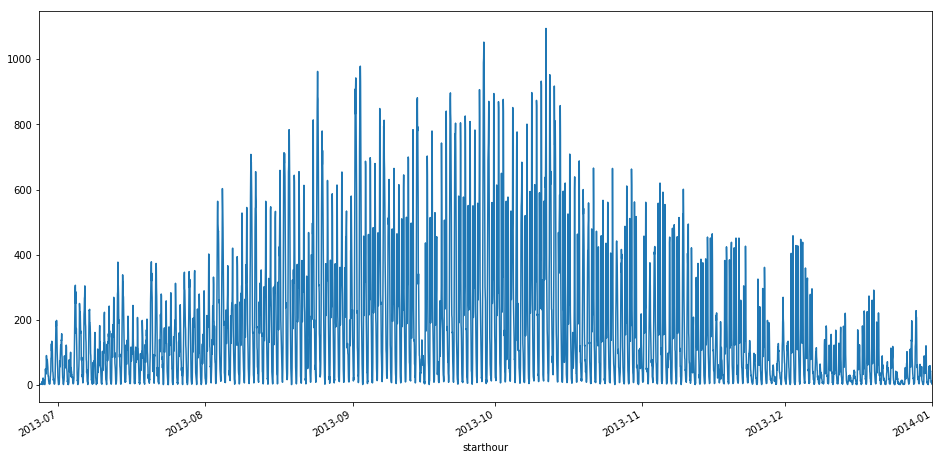

In [85]:
# number of trips started by starthour
divvy.groupby('starthour').size().plot(figsize=(16,8))

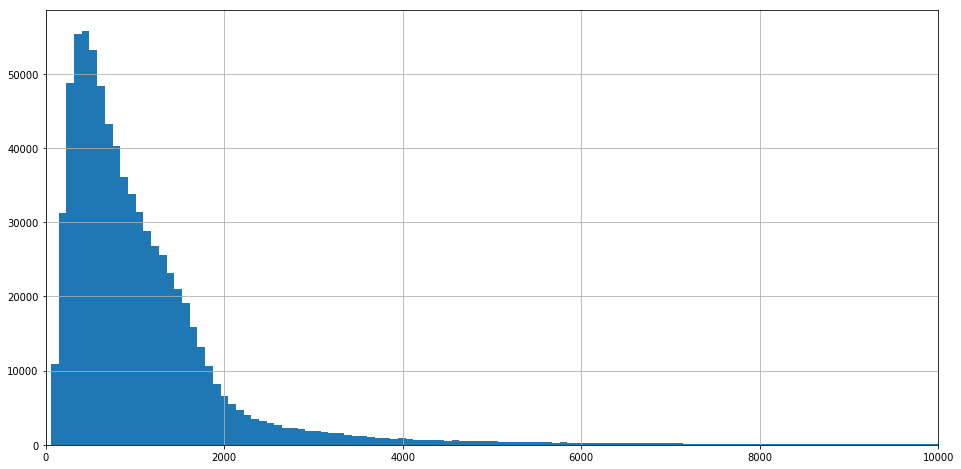

In [89]:
# distribution of tripduration
divvy.tripduration.hist(figsize=(16,8), bins=1000)
plt.xlim(0, 10000);

In [90]:
duration_counts = divvy.tripduration.value_counts()
duration_counts.index.name = 'seconds'
duration_counts.name = 'trips'
duration_counts.head()

seconds
408    712
399    711
346    706
379    701
415    700
Name: trips, dtype: int64

In [92]:
df = duration_counts.reset_index()
df['minutes'] = df.seconds/60.
df.set_index('minutes', inplace=True)
df.sort_values('minutes',inplace=True)

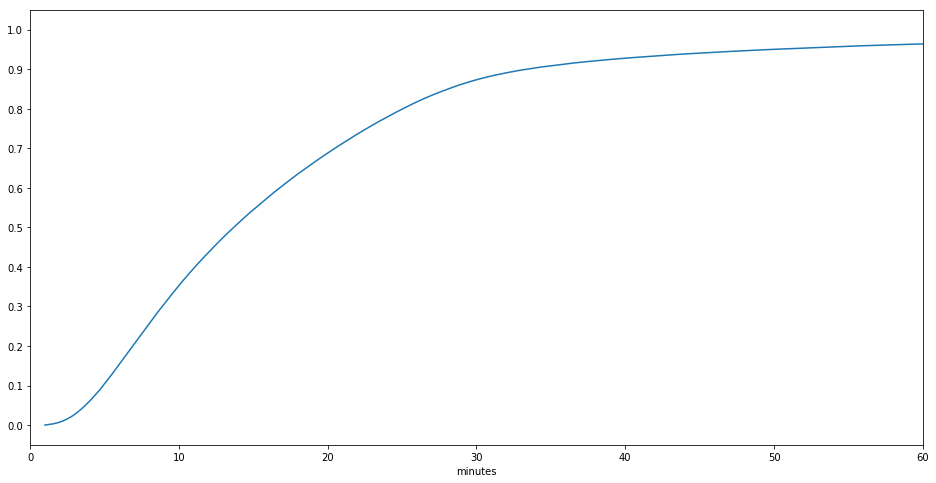

In [93]:
(df.trips.cumsum() / df.trips.sum()).plot(figsize=(16,8))
plt.xlim(0, 60)
plt.yticks(np.arange(0, 1.1, 0.1));

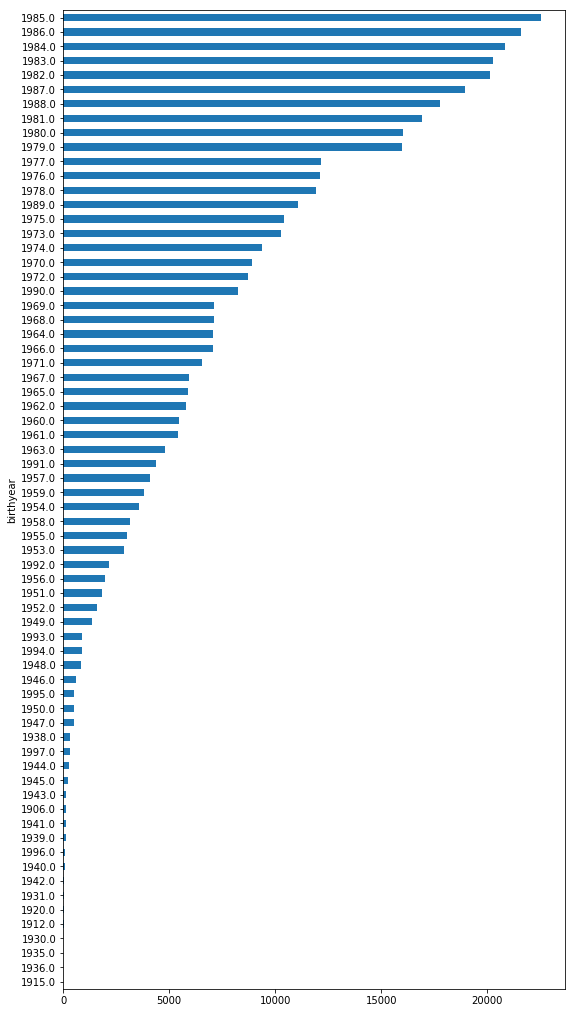

In [95]:
plt.figure(figsize=(9, 18))
divvy.groupby('birthyear').size().sort_values().plot(kind='barh')

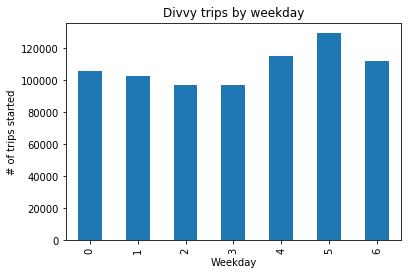

In [96]:
divvy.groupby(divvy['starttime'].apply(lambda d: d.dayofweek))['trip_id'].count().plot(kind='bar')
plt.title('Divvy trips by weekday') # 0 = Monday ...
plt.xlabel('Weekday')
plt.ylabel('# of trips started');

In [97]:
divvy['startdate'] = divvy.starthour.apply(lambda d: d.date())
by_gender = divvy.groupby(['startdate', 'gender']).size()

In [98]:
by_gender.head()

startdate   gender
2013-06-27  Female     14
            Male       45
2013-06-28  Female     75
            Male      321
2013-06-29  Female     42
dtype: int64

In [99]:
by_gender.unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14.0,45.0
2013-06-28,75.0,321.0
2013-06-29,42.0,163.0
2013-06-30,47.0,180.0
2013-07-01,87.0,449.0


In [101]:
# SELECT startdate
#    , COUNT(IF(gender = 'Female', 1, NULL))
#    , COUNT(IF(gender = 'Male', 1, NULL))
# FROM divvy
# GROUP BY startdate
# LIMIT 5;
divvy.groupby(['startdate', 'gender']).size().unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14.0,45.0
2013-06-28,75.0,321.0
2013-06-29,42.0,163.0
2013-06-30,47.0,180.0
2013-07-01,87.0,449.0


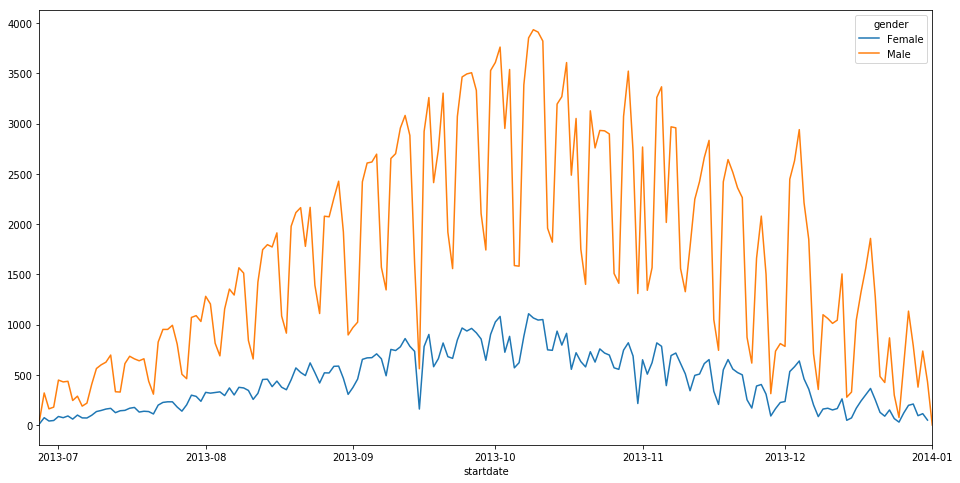

In [102]:
by_gender.unstack(1).plot(figsize=(16,8))

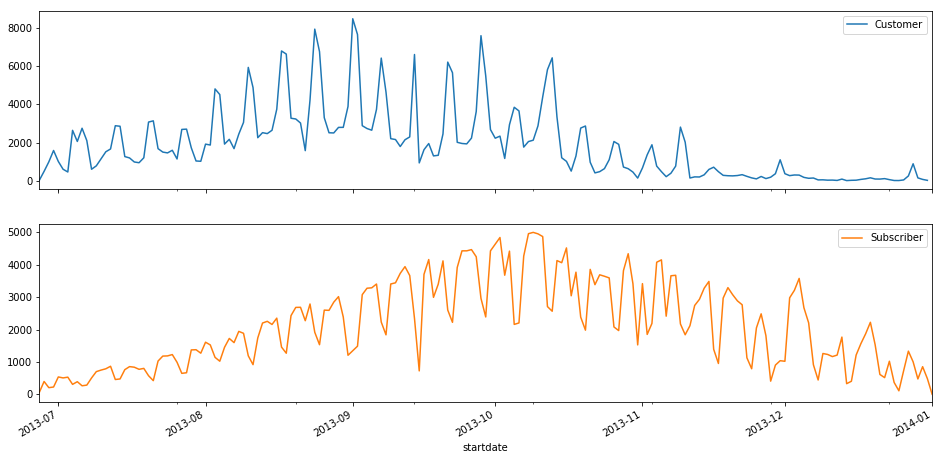

In [103]:
divvy.groupby(['startdate', 'usertype']).size().unstack(1).plot(figsize=(16,8), subplots=True);

In [104]:
weekdays = divvy['starttime'].apply(lambda d: d.dayofweek)
hours = divvy['starttime'].apply(lambda d: d.hour)
by_weekday_hour = divvy.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour'] # rename MultiIndex

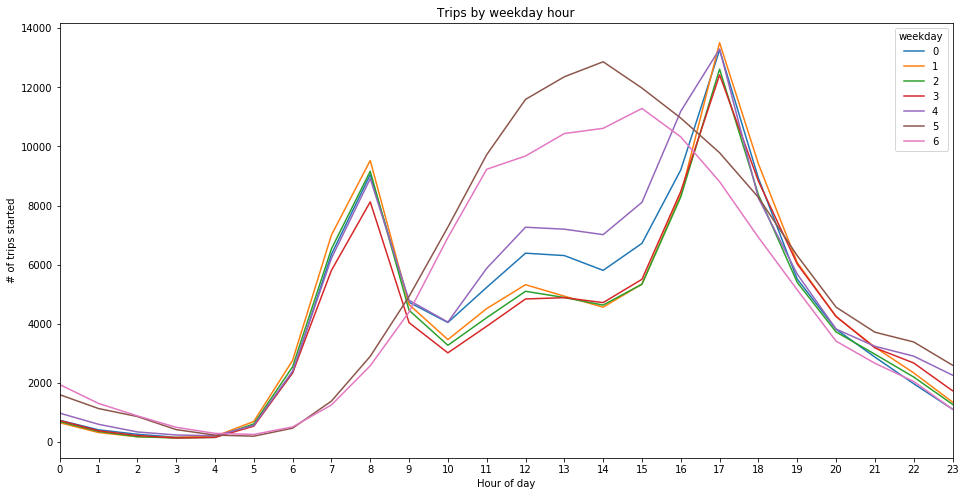

In [105]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);